In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
sales = pd.read_csv('../data/sales_history.csv')
item_cat = pd.read_csv('../data/item_categories.csv')
cat_name = pd.read_csv('../data/category_names.csv')
test = pd.read_csv('../data/test.csv')

In [4]:
sales.columns = 'date shop_id item_id price amount'.split()

In [6]:
test.columns

Index(['index', '商品ID', '店舗ID'], dtype='object')

In [5]:
test.columns = 'id shop_id'.split()

In [6]:
df.columns = 'date shop_id id price quantity'.split()

In [7]:
df.columns

Index(['date', 'shop_id', 'id', 'price', 'quantity'], dtype='object')

In [8]:
def add_monthly_idx(x):
    if x >= '2018-01-01' and x < '2018-02-01':
        return 0
    elif x >= '2018-02-01' and x < '2018-03-01':
        return 1
    elif x >= '2018-03-01' and x < '2018-04-01':
        return 2
    elif x >= '2018-04-01' and x < '2018-05-01':
        return 3
    elif x >= '2018-05-01' and x < '2018-06-01':
        return 4
    elif x >= '2018-06-01' and x < '2018-07-01':
        return 5
    elif x >= '2018-07-01' and x < '2018-08-01':
        return 6
    elif x >= '2018-08-01' and x < '2018-09-01':
        return 7
    elif x >= '2018-09-01' and x < '2018-10-01':
        return 8
    elif x >= '2018-10-01' and x < '2018-11-01':
        return 9
    elif x >= '2018-11-01' and x < '2018-12-01':
        return 10
    elif x >= '2018-12-01' and x < '2019-01-01':
        return 11
    elif x >= '2019-01-01' and x < '2019-02-01':
        return 12
    elif x >= '2019-02-01' and x < '2019-03-01':
        return 13
    elif x >= '2019-03-01' and x < '2019-04-01':
        return 14
    elif x >= '2019-04-01' and x < '2019-05-01':
        return 15
    elif x >= '2019-05-01' and x < '2019-06-01':
        return 16
    elif x >= '2019-06-01' and x < '2019-07-01':
        return 17
    elif x >= '2019-07-01' and x < '2019-08-01':
        return 18
    elif x >= '2019-08-01' and x < '2019-09-01':
        return 19
    elif x >= '2019-09-01' and x < '2019-10-01':
        return 20
    elif x >= '2019-10-01' and x < '2019-11-01':
        return 21
    else:
        return 22 


In [9]:
df['month_idx'] =  df['date'].apply(add_monthly_idx)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119570 entries, 0 to 1119569
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   date       1119570 non-null  object 
 1   shop_id    1119570 non-null  int64  
 2   id         1119570 non-null  int64  
 3   price      1119570 non-null  int64  
 4   quantity   1119570 non-null  float64
 5   month_idx  1119570 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 51.2+ MB


In [11]:
df.tail()

,date,shop_id,id,price,quantity,month_idx
1119565,2019-10-31,8,3400006,2700,1.0,21
1119566,2019-10-31,7,3400009,1020,1.0,21
1119567,2019-10-31,7,3400012,510,1.0,21
1119568,2019-10-31,4,3500001,340,1.0,21
1119569,2019-10-31,13,3500004,420,1.0,21


In [12]:
df = df[df['id'].isin(test['id'])]

In [19]:
monthly_sold = df.groupby(['id','month_idx','shop_id'],as_index=False).agg({'price': 'mean', 'quantity': 'sum'})

In [20]:
test.head()

,id,shop_id
index,,
0,1000001,0
1,1000001,1
2,1000001,2
3,1000001,3
4,1000001,4


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3060 entries, 0 to 3059
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       3060 non-null   int64
 1   shop_id  3060 non-null   int64
dtypes: int64(2)
memory usage: 151.7 KB


In [22]:
monthly_sold.head()

,id,month_idx,shop_id,price,quantity
0,1000001,0,0,420.0,6.0
1,1000001,0,1,325.0,2.0
2,1000001,0,2,420.0,1.0
3,1000001,0,3,420.0,2.0
4,1000001,0,5,380.0,2.0


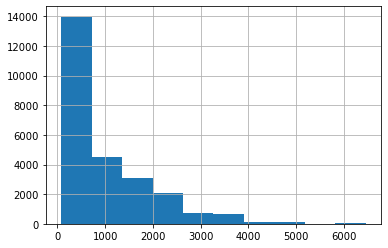

In [14]:
monthly_sold['price'].hist()

In [17]:
month_cnt('2018-02-01')

1

In [13]:
df.index

Int64Index([      0,       1,       2,     364,     365,     366,     367,
                368,     369,     370,
            ...
            1119522, 1119523, 1119524, 1119525, 1119541, 1119551, 1119553,
            1119562, 1119563, 1119568],
           dtype='int64', length=48221)

In [21]:
df.head()

,shop_id,id,price,quantity
日付,,,,
2018-01-01,9,1000001,420,1.0
2018-01-01,6,1000001,420,1.0
2018-01-01,10,1000001,420,1.0
2018-01-01,0,1200007,250,1.0
2018-01-01,15,1200007,130,1.0
